# Imputing Missing Values using Gaussian Process

In [1]:
from mimic.data_imputation.impute_GP import GPImputer
import pandas as pd
import numpy as np

In [2]:
data_to_infer = pd.read_csv(
    r"simulations0.csv", header=None, sep=",")

In [3]:
# Fraction of rows to remove
fraction = 0.1

# Randomly select fraction of y-values
missing_y = data_to_infer.iloc[:, 1].sample(frac=fraction)

# Set the selected y-values to NaN
data_to_infer.loc[missing_y.index, 1] = np.nan

# Now data_to_infer has 10% of y-values in the second column set to NaN

In [4]:
data_to_infer.iloc[:, 1].isnull().sum()

10

Model: GPR
Best kernel: <class 'gpflow.kernels.stationaries.RationalQuadratic'>
BIC: 676.3319237645487


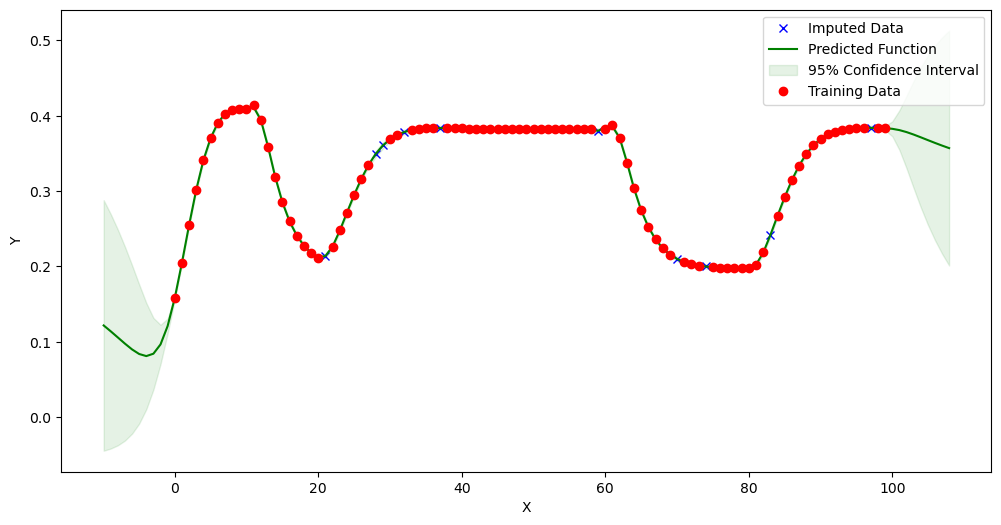

In [5]:
new_dataset = GPImputer().impute_missing_values(data_to_infer, [0], [1], 1)

In [6]:
new_dataset.iloc[:, 1].isnull().sum()

0

Model: GPR
Best kernel: <class 'gpflow.kernels.stationaries.SquaredExponential'>
BIC: 590.7569493967403


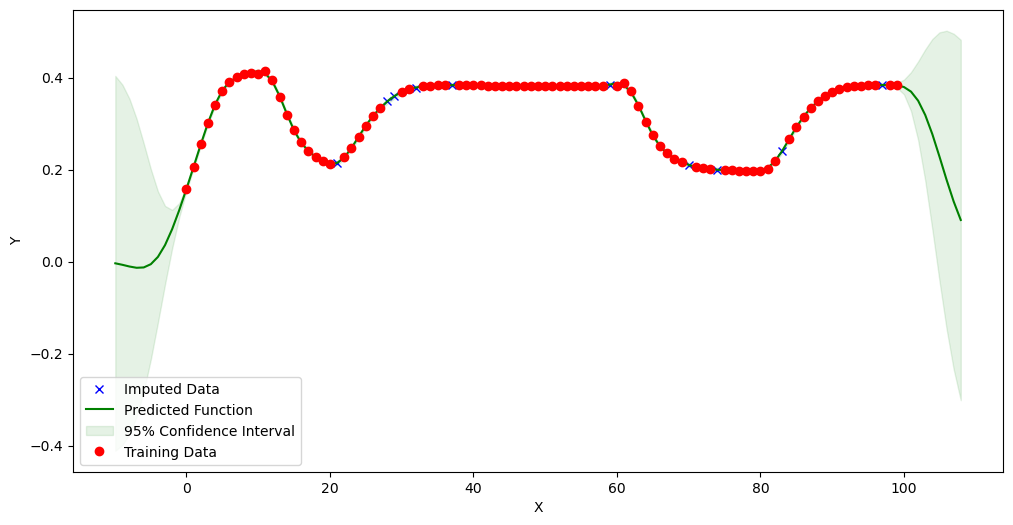

In [7]:
new_dataset2 = GPImputer().impute_missing_values(
    data_to_infer, [0], [1], 1, 'RBF')

Model: GPR
Best kernel: <class 'gpflow.kernels.stationaries.Matern32'>
BIC: 661.8924215749188


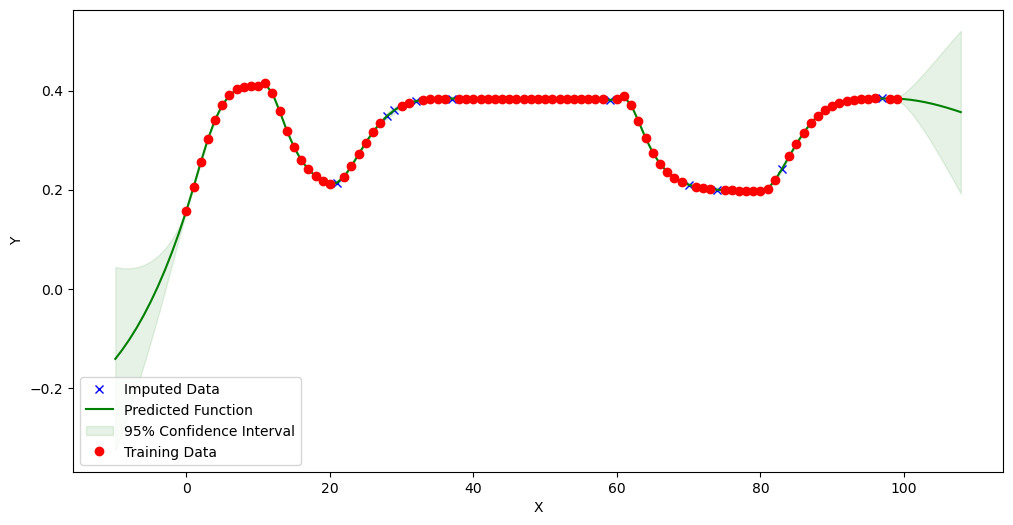

In [8]:
new_dataset2 = GPImputer().impute_missing_values(
    data_to_infer, [0], [1], 1, 'M32')